Mounting Drive to fetch Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import numpy as np
import pandas as pd

import os
count=0;
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain_tumor_3000'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        count+=1
print("Images count = ",count)


Images count =  3274


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import seaborn as sns

In [6]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt

Labelling Images with their corresponding type of Brain Tumor

In [7]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_3000/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_3000/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


Plotting a sample of randomly shuffled images.

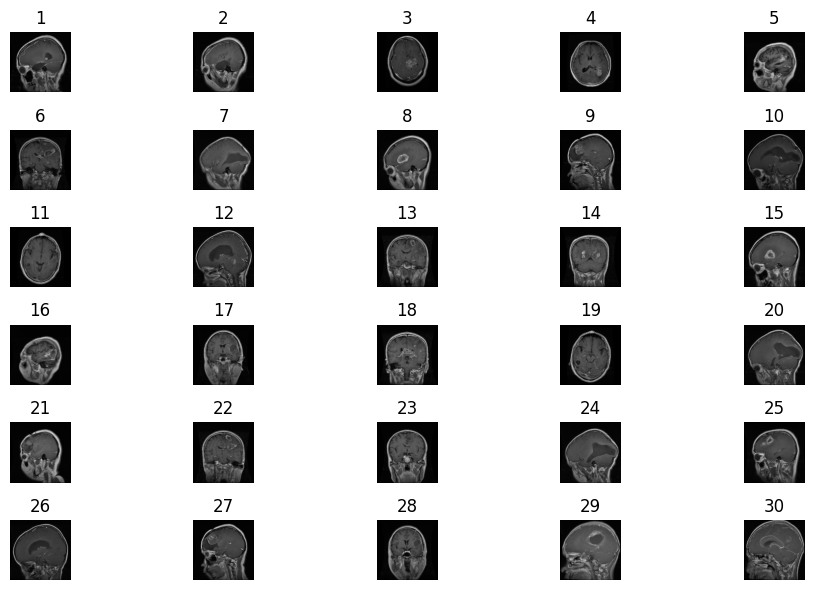

In [8]:
num_images_to_display = min(30, X_train.shape[0])
num_cols = 5
num_rows = (num_images_to_display + num_cols - 1) // num_cols

plt.figure(figsize=(10, 6))

for i in range(num_images_to_display):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'{i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape
print(Y_train)

['meningioma_tumor' 'pituitary_tumor' 'glioma_tumor' ...
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor']


Splitting Dataset for Training and Testing (90%,10%)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [11]:
print(X_train.shape)

(2946, 150, 150, 3)


In [12]:
print(y_train)

['glioma_tumor' 'glioma_tumor' 'pituitary_tumor' ... 'pituitary_tumor'
 'meningioma_tumor' 'no_tumor']


In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network (coustom layered model)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 28s 183ms/step - loss: 1.9726 - accuracy: 0.3074 - val_loss: 1.3088 - val_accuracy: 0.3119
Epoch 2/30
83/83 [==============================] - 8s 93ms/step - loss: 1.1765 - accuracy: 0.4749 - val_loss: 1.1797 - val_accuracy: 0.4034
Epoch 3/30
83/83 [==============================] - 8s 96ms/step - loss: 0.9523 - accuracy: 0.5877 - val_loss: 0.8255 - val_accuracy: 0.6441
Epoch 4/30
83/83 [==============================] - 7s 88ms/step - loss: 0.8437 - accuracy: 0.6379 - val_loss: 0.7700 - val_accuracy: 0.6780
Epoch 5/30
83/83 [==============================] - 7s 90ms/step - loss: 0.7543 - accuracy: 0.6748 - val_loss: 0.7550 - val_accuracy: 0.6678
Epoch 6/30
83/83 [==============================] - 8s 91ms/step - loss: 0.6655 - accuracy: 0.7235 - val_loss: 0.5970 - val_accuracy: 0.7220
Epoch 7/30
83/83 [==============================] - 8s 93ms/step - loss: 0.5462 - accuracy: 0.7790 - val_loss: 0.5535 - val_accuracy: 0.7864
Epoch 8/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


training  accuracy 98.75518679618835
Validation accuracy 92.54237413406372


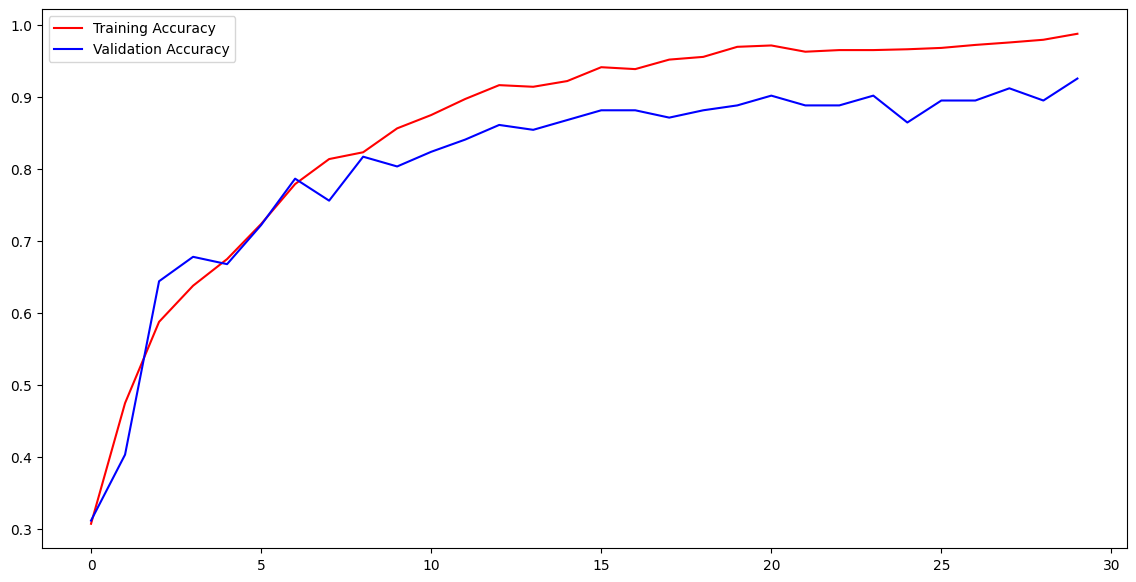

In [23]:
model.save('/content/sample_data/braintumor.h5')

acc = history.history['accuracy']
print("training  accuracy",acc[len(acc)-1]*100)
val_acc = history.history['val_accuracy']
print("Validation accuracy",val_acc[len(val_acc)-1]*100)
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()
# print(val_acc)

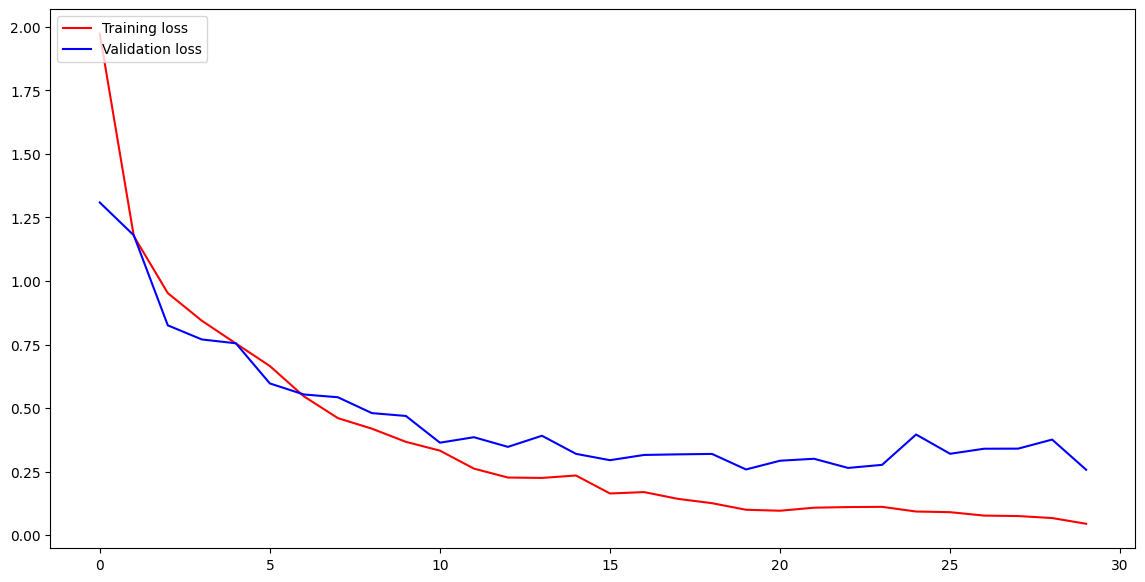

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [20]:
pred=model.predict(X_test)
Y_pred = np.argmax(pred, 1)
print(X_test.shape)

11/11 [==============================] - 1s 80ms/step
(328, 150, 150, 3)


In [21]:
print(Y_pred.shape)

(328,)


Confusion Matrix for the Model

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and Y_pred are NumPy arrays or lists
print('Confusion Matrix')
print(confusion_matrix(y_test, Y_pred))


Confusion Matrix
[[78 13  6  0]
 [ 3 79  0  1]
 [ 0  3 55  1]
 [ 0  6  0 83]]


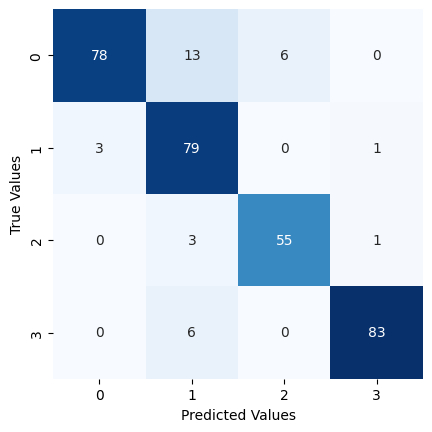

In [34]:
import seaborn as sns
cm=confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [35]:
tp = np.diag(cm)
total = np.sum(cm)

accuracy = np.sum(tp) / total

precision = tp / np.sum(cm, axis=0)
recall = tp / np.sum(cm, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

micro_precision = np.sum(tp) / np.sum(cm)
micro_recall = np.sum(tp) / np.sum(cm)
micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

print(f'Accuracy: {accuracy*100:.4f}')
for i in range(len(labels)):
    print(f'Class {i + 1} - Precision: {precision[i]*100:.4f}, Recall: {recall[i]*100:.4f}, F1 Score: {f1_score[i]*100:.4f}')


Accuracy: 89.9390
Class 1 - Precision: 96.2963, Recall: 80.4124, F1 Score: 87.6404
Class 2 - Precision: 78.2178, Recall: 95.1807, F1 Score: 85.8696
Class 3 - Precision: 90.1639, Recall: 93.2203, F1 Score: 91.6667
Class 4 - Precision: 97.6471, Recall: 93.2584, F1 Score: 95.4023


In [36]:
img = cv2.imread('/content/drive/MyDrive/brain_tumor_3000/Testing/meningioma_tumor/image(100).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [37]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

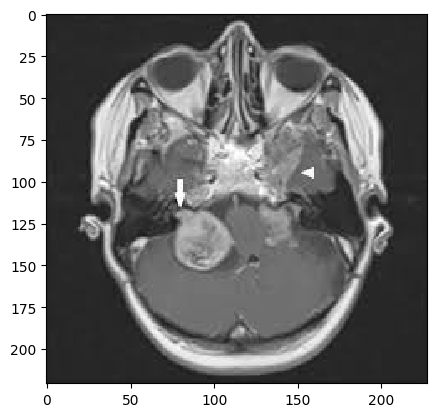

In [38]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor_3000/Testing/meningioma_tumor/image(100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [39]:
a=model.predict(img_array)
print(a)
indices = a.argmax()
print(labels)
indices

1/1 [==============================] - 1s 648ms/step
[[3.0121542e-04 9.9969423e-01 3.2488185e-06 1.2758424e-06]]
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


1

Using VGG-16 CNN Model


In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                 

Fitting the model with Dataset with 10% Validating split

In [41]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
83/83 [==============================] - 46s 363ms/step - loss: 11.9646 - accuracy: 0.3003 - val_loss: 1.3712 - val_accuracy: 0.2881
Epoch 2/25
83/83 [==============================] - 18s 222ms/step - loss: 1.4031 - accuracy: 0.3482 - val_loss: 1.2380 - val_accuracy: 0.5153
Epoch 3/25
83/83 [==============================] - 18s 219ms/step - loss: 1.1722 - accuracy: 0.4772 - val_loss: 1.1368 - val_accuracy: 0.5085
Epoch 4/25
83/83 [==============================] - 18s 221ms/step - loss: 1.0088 - accuracy: 0.5424 - val_loss: 0.9972 - val_accuracy: 0.5559
Epoch 5/25
83/83 [==============================] - 18s 221ms/step - loss: 0.8825 - accuracy: 0.6205 - val_loss: 0.8079 - val_accuracy: 0.6814
Epoch 6/25
83/83 [==============================] - 18s 221ms/step - loss: 0.7082 - accuracy: 0.7265 - val_loss: 0.7480 - val_accuracy: 0.7186
Epoch 7/25
83/83 [==============================] - 18s 221ms/step - loss: 0.6503 - accuracy: 0.7510 - val_loss: 0.6006 - val_accuracy: 0.779

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


training  accuracy 95.2847957611084
testing accuracy 89.15254473686218


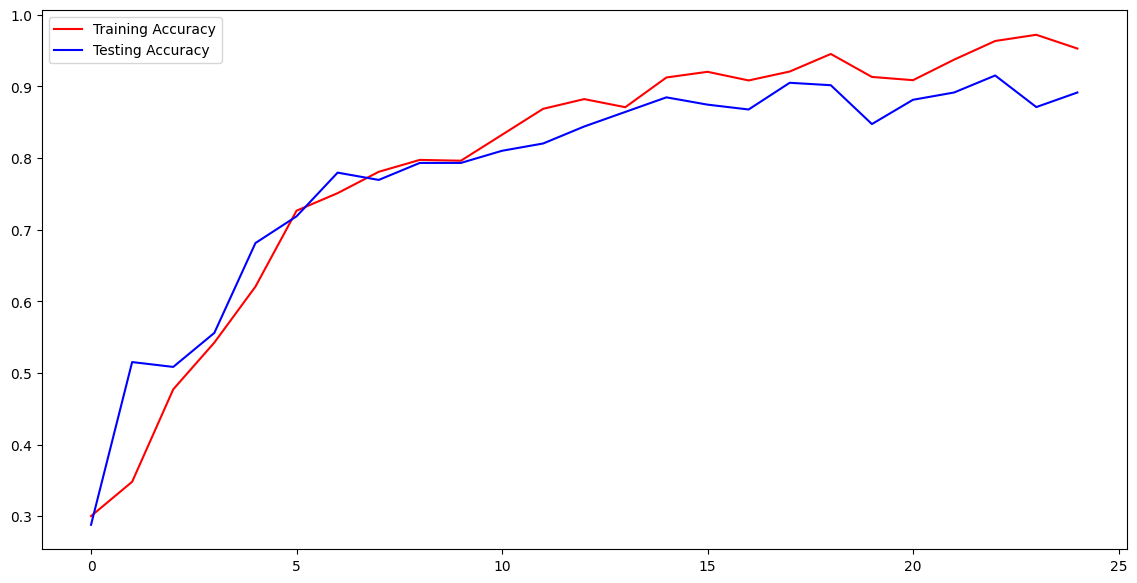

In [42]:
model.save('/content/sample_data/braintumor.h5')

acc = history.history['accuracy']
print("training  accuracy",acc[len(acc)-1]*100)
val_acc = history.history['val_accuracy']
print("testing accuracy",val_acc[len(val_acc)-1]*100)
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Testing Accuracy")
plt.legend(loc='upper left')
plt.show()
# print(val_acc)

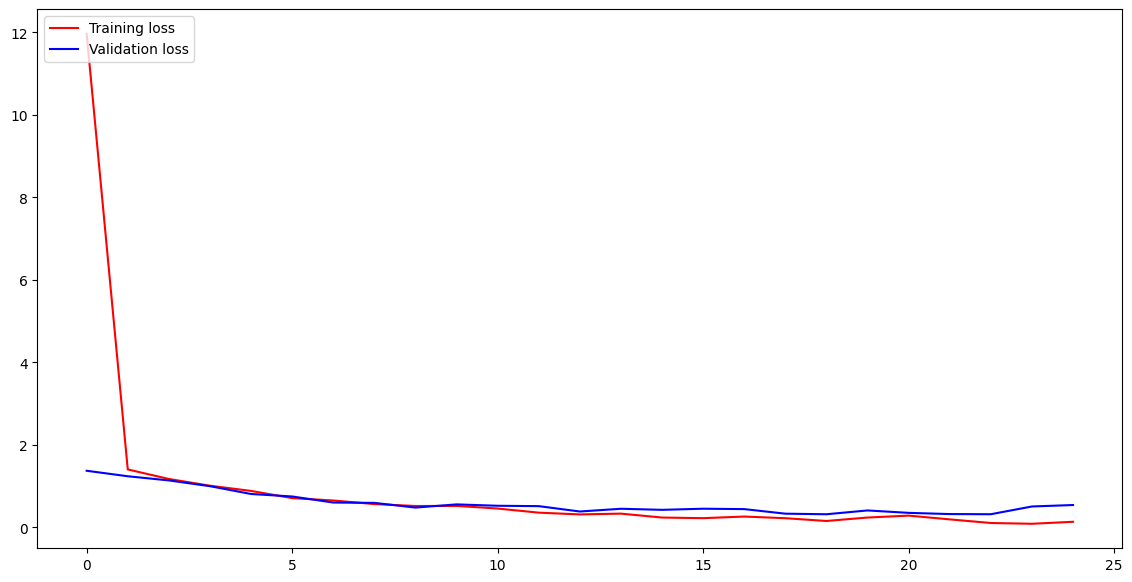

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [44]:
pred=model.predict(X_test)
Y_pred = np.argmax(pred, 1)
print(X_test.shape)

11/11 [==============================] - 2s 202ms/step
(328, 150, 150, 3)


Calculating a Confusion Matrix

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, Y_pred))

Confusion Matrix
[[80 11  4  2]
 [ 6 70  4  3]
 [ 6  6 46  1]
 [ 2  8  1 78]]


Plotting a HeatMap for the calculated Confusion Matrix

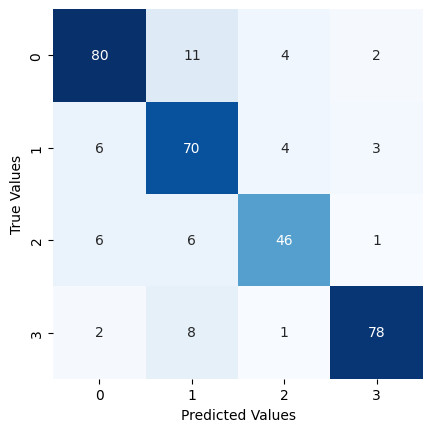

In [46]:
import seaborn as sns
cm=confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

Extracting Precision , F1 score from Confusion Matrix

In [47]:
tp = np.diag(cm)
total = np.sum(cm)

accuracy = np.sum(tp) / total

precision = tp / np.sum(cm, axis=0)
recall = tp / np.sum(cm, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

micro_precision = np.sum(tp) / np.sum(cm)
micro_recall = np.sum(tp) / np.sum(cm)
micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

print(f'Accuracy: {accuracy*100:.4f}')
for i in range(len(labels)):
    print(f'Class {i + 1} - Precision: {precision[i]*100:.4f}, Recall: {recall[i]*100:.4f}, F1 Score: {f1_score[i]*100:.4f}')


Accuracy: 83.5366
Class 1 - Precision: 85.1064, Recall: 82.4742, F1 Score: 83.7696
Class 2 - Precision: 73.6842, Recall: 84.3373, F1 Score: 78.6517
Class 3 - Precision: 83.6364, Recall: 77.9661, F1 Score: 80.7018
Class 4 - Precision: 92.8571, Recall: 87.6404, F1 Score: 90.1734
